In [1]:
#!touch 0-conv_forward.py
!chmod +x *.py
~/hb/holbertonschool-machine_learning/supervised_learning/0x07-cnn

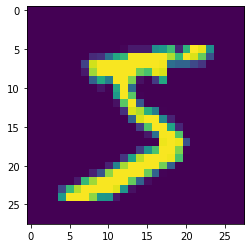

IndexError: index 1 is out of bounds for axis 3 with size 1

In [4]:
#!/usr/bin/env python3

import matplotlib.pyplot as plt
import numpy as np
#conv_forward = __import__('0-conv_forward').conv_forward
def conv_forward(A_prev, W, b, activation, padding="same", stride=(1, 1)):
    """ doc """
    m, imgh, imgw, c = A_prev.shape
    kh, kw, kc, knc = W.shape
    sh, sw = stride
    imghp, imgwp = 0, 0
    if padding == 'same':
        imghp = (((imgh - 1) * sh + kh - imgh) // 2) + 1
        imgwp = (((imgw - 1) * sw + kw - imgw) // 2) + 1

    if type(padding) == tuple:
        imghp, imgwp = padding
    imgh, imgw = (imgh-kh+2*imghp)//sh + 1, (imgw-kw+2*imgwp)//sw + 1
    output = np.zeros((m, imgh, imgw, knc))
    new = np.pad(A_prev, ((0, 0), (imghp, imghp),
                          (imgwp, imgwp), (0, 0)),
                 'constant')
    for k in range(knc):
        for i in range(imgh):
            for j in range(imgw):
                output[:, i, j, k] = np.sum(new[:,
                                                i*sh:i*sh+kh,
                                                j*sw:j*sw+kw, :]
                                            * W[..., k],
                                            axis=(1, 2, 3))
    return activation(output)

if __name__ == "__main__":
    np.random.seed(0)
    lib = np.load('../data/MNIST.npz')
    X_train = lib['X_train']
    m, h, w = X_train.shape
    X_train_c = X_train.reshape((-1, h, w, 1))

    W = np.random.randn(3, 3, 1, 2)
    b = np.random.randn(1, 1, 1, 2)

    def relu(Z):
        return np.maximum(Z, 0)

    plt.imshow(X_train[0])
    plt.show()
    A = conv_forward(X_train_c, W, b, relu, padding='valid')
    print(A.shape)
    plt.imshow(A[0, :, :, 0])
    plt.show()
    plt.imshow(A[0, :, :, 1])
    plt.show()

In [ ]:
#include <stdio.h>
#include <stdlib.h>
#include "lists.h"

/**
 * check_cycle - checks if a singly linked list has a cycle in it
 * @list: pointer to head of list
 * Return: 0 or 1
 */
int check_cycle(listint_t *list)
{
    listint_t *tmp, *current;

    if (list == NULL)
        return (0);
    tmp = list;
    while (tmp->next != NULL)
    {
        current = tmp;
        while (current->next != NULL)
        {
            if (tmp == current->next)
            {
                return (1);
            }
            current = current->next;
        }
        tmp = tmp->next;
    }
    return (0);
}
